<a href="https://colab.research.google.com/github/RonaldBH/Ruben-Ronald-Bautista-Huillca/blob/main/Analisis_de_energia_DeepLeargin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bautista Huillca Ruben Ronald
##184641
##Analisis de comsumo de potencia de comsumo energetico
08/02/2022

In [ ]:
# Librerías
import numpy as np
np.random.seed(4)
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import figure
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
def graficar_predicciones(real, prediccion):
    figure(figsize=(10, 6), dpi=80)
    plt.plot(real[0:len(prediccion)],color='red', label='Valor real de la acción')
    plt.plot(prediccion, color='blue', label='Predicción de la acción')
    plt.ylim(1.1 * np.min(prediccion)/2, 1.1 * np.max(prediccion))
    plt.xlabel('Tiempo')
    plt.ylabel('Valor de la acción')
    plt.legend()
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Cargar datos**

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/20222colab/deeplearning/Carpeta sin título/power_consumption_of_house.txt", sep=';', low_memory=False)
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
data.shape

(2075259, 9)

# **Preprocesamiento**

Eliminación de datos en la columna Global_active_power con simbolos no numéricos

In [ ]:
dataset = data[data['Global_active_power'].str.contains("\?")==False]
#dataset['Datetime'] = pd.to_datetime(dataset.Date.astype(str) + ' ' +dataset.Time.astype(str))
dataset['Datetime'] = pd.to_datetime(dataset.Date)

<ipython-input-7-72a73556a74d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Datetime'] = pd.to_datetime(dataset.Date)


Crear un subdataset que solo contenga las columnas necesarias

In [ ]:
# Crear subdataset con 2 columnas (Datetime, Global_active_power)
new_data = dataset[['Datetime', 'Global_active_power']]
new_data['Global_active_power'] = pd.to_numeric(new_data['Global_active_power'])

<ipython-input-8-aa44b3cf3f4b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Global_active_power'] = pd.to_numeric(new_data['Global_active_power'])


## Agrupar datos del mismo día utilizando la media para la columna GLobal_active_power

In [ ]:
new_data = new_data.groupby(['Datetime']).mean()
#new_data = new_data.set_index('Datetime')
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1433 entries, 2006-12-16 to 2010-12-11
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Global_active_power  1433 non-null   float64
dtypes: float64(1)
memory usage: 22.4 KB


Resultado del dataset después del preprocesamiento

In [ ]:
new_data

,Global_active_power
Datetime,
2006-12-16,3.053475
2006-12-17,2.354486
2006-12-18,1.530435
2006-12-19,1.157079
2006-12-20,1.545658
...,...
2010-12-07,0.770538
2010-12-08,0.367846
2010-12-09,1.119508


### **Visualización**

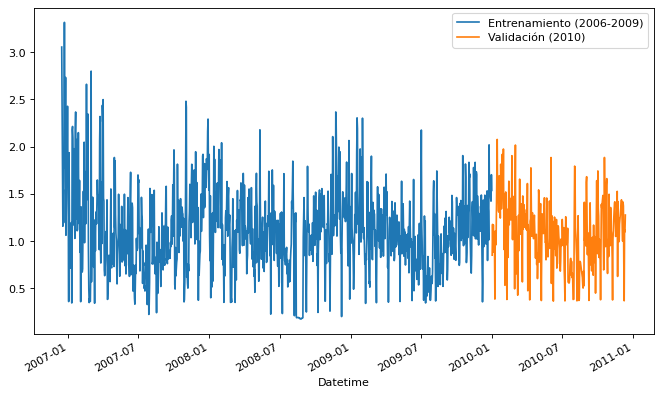

In [ ]:
set_entrenamiento = new_data[:'2009'].iloc[:,0:1]
set_validacion = new_data['2010':].iloc[:,0:1]

figure(figsize=(10, 6), dpi=80)
set_entrenamiento['Global_active_power'].plot(legend=True)
set_validacion['Global_active_power'].plot(legend=True)
plt.legend(['Entrenamiento (2006-2009)', 'Validación (2010)'])
plt.show()

##Obtencion de data

In [ ]:
dataset=data.dropna()

In [ ]:
dataset['Global_active_power'] =dataset['Global_active_power'].astype(float)
dataset['Global_active_power']=dataset['Global_active_power'].astype(float)
dataset['Global_reactive_power']=dataset['Global_reactive_power'].astype(float)
dataset['Voltage']=dataset['Voltage'].astype(float)
dataset['Global_intensity']=dataset['Global_intensity'].astype(float)
dataset['Sub_metering_1']=dataset['Sub_metering_1'].astype(float)
dataset['Sub_metering_2']=dataset['Sub_metering_2'].astype(float)
dataset['Sub_metering_3']=dataset['Sub_metering_3'].astype(float)

<ipython-input-13-3dc372e8fa6e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Global_active_power'] =dataset['Global_active_power'].astype(float)
<ipython-input-13-3dc372e8fa6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Global_active_power']=dataset['Global_active_power'].astype(float)
<ipython-input-13-3dc372e8fa6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [ ]:
dataset.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [ ]:
dataset

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [ ]:
group=dataset.groupby("Date")
data=group["Global_active_power"].mean()
data.shape

(1433,)

In [ ]:
data

Date
1/1/2007     1.909031
1/1/2008     1.916485
1/1/2009     0.976869
1/1/2010     0.850175
1/10/2007    1.195085
               ...   
9/8/2010     0.371572
9/9/2007     1.166321
9/9/2008     0.805315
9/9/2009     1.056489
9/9/2010     0.860218
Name: Global_active_power, Length: 1433, dtype: float64

In [ ]:
close_train=data.iloc[:len(data)-60]
close_test=data.iloc[len(close_train):]

close_train=np.array(close_train)
close_train=close_train.reshape(close_train.shape[0],1)

##NORMALIZACION PARA EL ENTRENAMIENTO

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
close_scaled=scaler.fit_transform(close_train)

In [ ]:
timestep=60
x_train=[]
y_train=[]

for i in range(timestep,close_scaled.shape[0]):
    x_train.append(close_scaled[i-timestep:i,0])
    y_train.append(close_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) #reshaped for RNN

print("x-train-shape= ",x_train.shape)
print("y-train-shape= ",y_train.shape)

x-train-shape=  (1313, 60, 1)
y-train-shape=  (1313,)


##CREACION DEL MODELO

In [ ]:
from sklearn.metrics import mean_absolute_error
from keras.layers import Dense, LSTM
from keras.models import Sequential
from keras.layers import Dense, Dropout
mode = Sequential()
mode.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
mode.add(Dropout(0.2))
mode.add(LSTM(100,return_sequences=False))
mode.add(Dropout(0.2))
mode.add(Dense(1, activation = "linear"))
mode.compile(loss="mean_squared_error",optimizer="rmsprop")


In [ ]:
mode.fit(x_train,y_train,epochs= 200,batch_size=64)

Epoch 1/200
21/21 [==============================] - 7s 11ms/step - loss: 0.0248
Epoch 2/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0185
Epoch 3/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0174
Epoch 4/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0163
Epoch 5/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0163
Epoch 6/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 7/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0155
Epoch 8/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 9/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0150
Epoch 10/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 11/200
21/21 [==============================] - 0s 9ms/step - loss: 0.0151
Epoch 12/200
21/21 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 13/200
21/21 [===========

##Realizar predicciones

In [ ]:
inputs=data[len(data)-len(close_test)-timestep:]
inputs=inputs.values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [ ]:
x_test=[]
for i in range(timestep,inputs.shape[0]):
    x_test.append(inputs[i-timestep:i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
predicted_data=mode.predict(x_test)
predicted_data=scaler.inverse_transform(predicted_data)

2/2 [==============================] - 1s 7ms/step


In [ ]:
data_test=np.array(close_test)
data_test=data_test.reshape(len(data_test),1)

###visualizar las prediciones

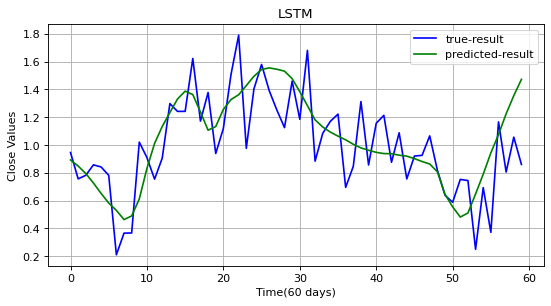

In [ ]:
plt.figure(figsize=(8,4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(data_test,color="b",label="true-result")
plt.plot(predicted_data,color="g",label="predicted-result")
plt.legend()
plt.title("LSTM")
plt.xlabel("Time(60 days)")
plt.ylabel("Close Values")
plt.grid(True)
plt.show()

##Realizando las comparaciones de los modelos implementados la  red GRU ] inicia con un error mayor que la red LSTM pero se van igualando conforme se va avanzando esto se puede comcluir que el error de la GRU disminuye mejor**